In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
app = pd.read_csv(r'application_record.csv')

rec = pd.read_csv(r'credit_record.csv')

In [3]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
app.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
app.duplicated().sum()

0

In [7]:
app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
app['ID'].nunique()

438510

we don't have an occupation type of 30% of our clients 

In [9]:
app['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64


if we drop nulls value from occupation so we will lose some clients so we will fill it by most common value because it's categorical data 

In [10]:
app.fillna('Laborers' , inplace=True)

In [11]:
app.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

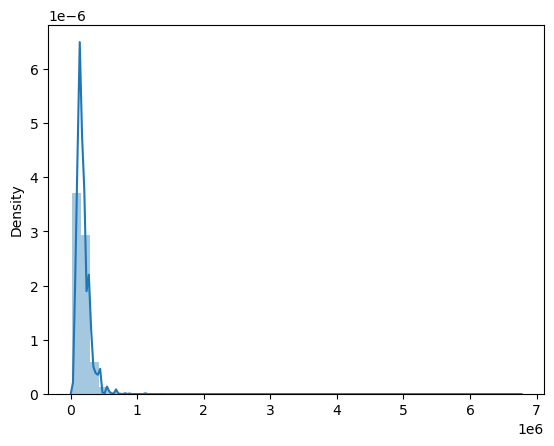

In [12]:
sns.distplot( x =app['AMT_INCOME_TOTAL']);

In [13]:
app['AMT_INCOME_TOTAL'].value_counts()

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

### Handling outliers

In [14]:
# By Applying IQR theory because the distribution is SKewed 

q1 = app['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = app['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3 - q1 

upper_whisker = q3 + 1.5* iqr
lower_whisker = q1 - 1.5* iqr
if lower_whisker < 0 :
    lower_whisker = 0 
filt2 = app['AMT_INCOME_TOTAL'] >  upper_whisker 
filt3 = app['AMT_INCOME_TOTAL'] <  lower_whisker

out2 = app[filt2].index
out3 = app[filt3].index
app.drop(out3 , axis = 0 , inplace =True)

In [15]:
upper_whisker , lower_whisker , out2

(380250.0,
 0,
 Int64Index([     0,      1,     29,     30,     31,     32,     33,     34,
                252,    253,
             ...
             438148, 438183, 438185, 438199, 438200, 438255, 438294, 438295,
             438337, 438481],
            dtype='int64', length=19108))

In [16]:
app['AMT_INCOME_TOTAL'][app['AMT_INCOME_TOTAL'] >  upper_whisker] = app['AMT_INCOME_TOTAL'].median() 

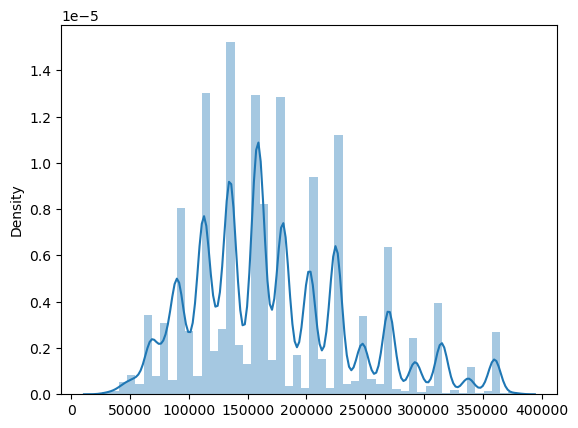

In [17]:
sns.distplot( x =app['AMT_INCOME_TOTAL']);

In [18]:
rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [19]:
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [20]:
rec['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [21]:
rec['STATUS'].replace(['C' , 'X','0','1','2','3','4','5' ],[1,1,1,0,0,0,0,0], inplace=True)

In [22]:
rec['STATUS'].value_counts()

1    1034381
0      14194
Name: STATUS, dtype: int64

In [23]:
rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1


In [24]:
data = app.merge(rec , how = 'inner' , on = 'ID')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [26]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,160780.5,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,1
1,5008804,M,Y,Y,0,160780.5,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,1
2,5008804,M,Y,Y,0,160780.5,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,1
3,5008804,M,Y,Y,0,160780.5,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,1
4,5008804,M,Y,Y,0,160780.5,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,1


### One Hot Encoding 

In [27]:
data = pd.get_dummies(data,columns=['CODE_GENDER','FLAG_OWN_CAR',
                                    'FLAG_OWN_REALTY' ])

### Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()


In [29]:
col = ['NAME_INCOME_TYPE' , 'NAME_EDUCATION_TYPE' ,
     'NAME_FAMILY_STATUS' ,'NAME_HOUSING_TYPE'
     ,'OCCUPATION_TYPE'] 
for i in col:

    data[i] = lb.fit_transform(data[i] )


In [30]:
data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,5008804,0,160780.5,4,1,0,4,-12005,-4542,1,...,8,2.0,0,1,0,1,0,1,0,1
1,5008804,0,160780.5,4,1,0,4,-12005,-4542,1,...,8,2.0,-1,1,0,1,0,1,0,1
2,5008804,0,160780.5,4,1,0,4,-12005,-4542,1,...,8,2.0,-2,1,0,1,0,1,0,1
3,5008804,0,160780.5,4,1,0,4,-12005,-4542,1,...,8,2.0,-3,1,0,1,0,1,0,1
4,5008804,0,160780.5,4,1,0,4,-12005,-4542,1,...,8,2.0,-4,1,0,1,0,1,0,1


In [31]:
x = data.drop('STATUS' , axis = 1)

y = data['STATUS']
x.drop('ID' , axis = 1 , inplace=True)

In [32]:
from sklearn.model_selection import train_test_split

train_x,test_x , train_y,test_y = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

In [33]:
data['STATUS'].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini' , n_estimators=100 ,n_jobs=-1 ,bootstrap=True)

In [35]:
model.fit(train_x,train_y)

RandomForestClassifier(n_jobs=-1)

In [36]:
y_pred = model.predict(test_x)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

print(accuracy_score(y_pred,test_y))
print(recall_score(y_pred,test_y))
print(precision_score(y_pred,test_y))
print(f1_score(y_pred,test_y))
print(confusion_matrix(y_pred,test_y))

0.9824935869823779
0.9886176961385875
0.9936695643093951
0.9911371928693948
[[   562    970]
 [  1753 152258]]


In [37]:
y_pred = model.predict(train_x)

print(accuracy_score(y_pred,train_y))
print(recall_score(y_pred,train_y))
print(precision_score(y_pred,train_y))
print(f1_score(y_pred,train_y))
print(confusion_matrix(y_pred,train_y))

0.9911744662247739
0.9922829175466777
0.9988089644190357
0.9955352460249379
[[  4499    730]
 [  4761 612182]]
